In [5]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup as bs
import missingno as msno

url = "https://airbnb13.p.rapidapi.com/search-location"

querystring = {"location":"Paris","checkin":"2023-09-16","checkout":"2023-09-17","adults":"1","children":"0","infants":"0","pets":"0","page":"1","currency":"USD"}

headers = {
	"content-type": "application/octet-stream",
	"X-RapidAPI-Key": "66a03bb484msh9286dfaee259352p14b45djsn5cc060ab1de9",
	"X-RapidAPI-Host": "airbnb13.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'error': False, 'headers': {'response_time': 1424, 'response_timestamp': '2023-05-10T01:41:58.510Z', 'response_id': 24286762}, 'results': [{'id': '43449093', 'url': 'https://www.airbnb.com/rooms/43449093', 'deeplink': 'https://www.airbnb.com/rooms/43449093?check_in=2023-09-16&check_out=2023-09-17&adults=1&children=0&infants=0&pets=0', 'position': 1, 'name': 'Room in the heart of Paris', 'bathrooms': 1, 'bedrooms': 1, 'beds': 1, 'city': 'Paris', 'images': ['https://a0.muscache.com/im/pictures/miso/Hosting-43449093/original/49a62f19-7135-45ae-9811-441891d5279d.jpeg?im_w=720', 'https://a0.muscache.com/im/pictures/4a07fe2a-8c53-47ff-9093-7e1732972f4d.jpg?im_w=720', 'https://a0.muscache.com/im/pictures/e8e77ec9-966c-407e-9ff6-f75231b9fbb5.jpg?im_w=720', 'https://a0.muscache.com/im/pictures/f37c0947-9f4e-409a-b98e-8db0f37d3e8f.jpg?im_w=720', 'https://a0.muscache.com/im/pictures/daa9323f-e8be-4c3d-9068-f6331ad5316a.jpg?im_w=720', 'https://a0.muscache.com/im/pictures/c3b8456c-4979-458e-a739-1

In [6]:
df = pd.json_normalize(response.json()['results'])
print(df.head())

                   id                                              url  \
0            43449093            https://www.airbnb.com/rooms/43449093   
1  855813754445433021  https://www.airbnb.com/rooms/855813754445433021   
2  774582581519038073  https://www.airbnb.com/rooms/774582581519038073   
3            42654284            https://www.airbnb.com/rooms/42654284   
4            31884678            https://www.airbnb.com/rooms/31884678   

                                            deeplink  position  \
0  https://www.airbnb.com/rooms/43449093?check_in...         1   
1  https://www.airbnb.com/rooms/85581375444543302...         2   
2  https://www.airbnb.com/rooms/77458258151903807...         3   
3  https://www.airbnb.com/rooms/42654284?check_in...         4   
4  https://www.airbnb.com/rooms/31884678?check_in...         5   

                                                name  bathrooms  bedrooms  \
0                         Room in the heart of Paris        1.0         1   
1   

In [7]:
texto = response.text
jsondata = json.loads(texto)

In [8]:
datos = response.json()["results"]
dfapi = pd.DataFrame.from_dict(datos)
dfapi.head()

,id,url,deeplink,position,name,bathrooms,bedrooms,beds,city,images,...,persons,reviewsCount,rating,type,userId,address,amenityIds,previewAmenities,cancelPolicy,price
0,43449093,https://www.airbnb.com/rooms/43449093,https://www.airbnb.com/rooms/43449093?check_in...,1,Room in the heart of Paris,1.0,1,1,Paris,[https://a0.muscache.com/im/pictures/miso/Host...,...,1,262,4.53,Entire rental unit,271527319,"Paris, Île-de-France, France","[35, 611, 4, 103, 40, 104, 42, 11, 44, 45, 77,...",[Wifi],CANCEL_MODERATE,"{'rate': 83, 'currency': 'USD', 'total': 83, '..."
1,855813754445433021,https://www.airbnb.com/rooms/855813754445433021,https://www.airbnb.com/rooms/85581375444543302...,2,"Love Nest, Marais",1.0,1,1,Paris,[https://a0.muscache.com/im/pictures/f5d51539-...,...,2,9,4.89,Entire rental unit,507176949,"Paris, Île-de-France, France","[1, 35, 4, 37, 8, 40, 12, 45, 77, 51, 85, 54, ...","[Wifi, Kitchen]",CANCEL_MODERATE,"{'rate': 98, 'currency': 'USD', 'total': 98, '..."
2,774582581519038073,https://www.airbnb.com/rooms/774582581519038073,https://www.airbnb.com/rooms/77458258151903807...,3,Chill out room.,1.0,1,1,Clichy,[https://a0.muscache.com/im/pictures/miso/Host...,...,1,28,4.93,Private room in bed and breakfast,296443273,"Clichy, Île-de-France, France","[1, 35, 227, 4, 5, 37, 8, 42, 15, 47, 287]","[Wifi, Kitchen]",CANCEL_FLEXIBLE,"{'rate': 49, 'currency': 'USD', 'total': 49, '..."
3,42654284,https://www.airbnb.com/rooms/42654284,https://www.airbnb.com/rooms/42654284?check_in...,4,Paris: Chambre en duplex à la Villette,1.0,1,1,Paris,[https://a0.muscache.com/im/pictures/miso/Host...,...,2,30,4.93,Private room in condo,44484854,"Paris, Île-de-France, France","[1, 33, 35, 611, 4, 100, 8, 40, 45, 77, 46, 15...","[Wifi, Kitchen, Washer]",CANCEL_FLEXIBLE,"{'rate': 111, 'currency': 'USD', 'total': 111,..."
4,31884678,https://www.airbnb.com/rooms/31884678,https://www.airbnb.com/rooms/31884678?check_in...,5,Quiet room - Private bathroom + toilet @ 5min ...,1.0,1,1,Issy-les-Moulineaux,[https://a0.muscache.com/im/pictures/miso/Host...,...,2,204,4.89,Private room in condo,322299,"Issy-les-Moulineaux, Île-de-France, France","[1, 129, 4, 73, 137, 10, 394, 77, 79, 21, 85, ...",[Wifi],CANCEL_MODERATE,"{'rate': 130, 'currency': 'USD', 'total': 130,..."


In [9]:
dfapi.shape

(40, 25)

In [10]:
dfapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                40 non-null     object 
 1   url               40 non-null     object 
 2   deeplink          40 non-null     object 
 3   position          40 non-null     int64  
 4   name              40 non-null     object 
 5   bathrooms         40 non-null     float64
 6   bedrooms          40 non-null     int64  
 7   beds              40 non-null     int64  
 8   city              40 non-null     object 
 9   images            40 non-null     object 
 10  hostThumbnail     40 non-null     object 
 11  isSuperhost       40 non-null     bool   
 12  rareFind          40 non-null     bool   
 13  lat               40 non-null     float64
 14  lng               40 non-null     float64
 15  persons           40 non-null     int64  
 16  reviewsCount      40 non-null     int64  
 17 

*Las "AmenityID" se corresponden con las siguientes:*

2 - Kitchen     
4 - Wifi    
5 - Air conditioning    
7 - Pool    
8 - Kitchen     
9 - Free parking on premises    
11 - Smoking allowed    
12 - Pets allowed   
15 - Gym    
16 - Breakfast  
21 - Elevator   
25 - Hot tub    
27 - Indoor fireplace   
30 - Heating    
33 - Washer     
34 - Dryer      
35 - Smoke alarm        
36 - Carbon monoxide alarm  
41 - Shampoo    
44 - Hangers    
45 - Hair dryer     
46 - Iron       
47 - Laptop-friendly workspace  
51 - Self check-in  
58 - TV     
64 - High chair     
78 - Private bathroom   
109 - Wide hallways     
110 - No stairs or steps to enter   
111 - Wide entrance for guests      
112 - Step-free path to entrance         
113 - Well-lit path to entrance     
114 - Disabled parking spot     
115 - No stairs or steps to enter       
116 - Wide entrance     
117 - Extra space around bed    
118 - Accessible-height bed     
120 - No stairs or steps to enter       
121 - Wide doorway to guest bathroom    
123 - Bathtub with bath chair   
125 - Accessible-height toilet  
127 - No stairs or steps to enter   
128 - Wide entryway     
136 - Handheld shower head  
286 - Crib  
288 - Electric profiling bed    
289 - Mobile hoist  
290 - Pool with pool hoist  
291 - Ceiling hoist     
294 - Fixed grab bars for shower    
295 - Fixed grab bars for toilet    
296 - Step-free shower  
297 - Shower chair  
347 - Piano     
608 - Extra space around toilet     
609 - Extra space around shower 

# Data Wrangling

## Dropeo de columnas

In [11]:
df = df.drop(columns=['url','deeplink','images','previewAmenities','price.rate','price.currency','price.priceItems','userId','lat','lng','hostThumbnail','address'],axis=1)
df.head()

,id,position,name,bathrooms,bedrooms,beds,city,isSuperhost,rareFind,persons,reviewsCount,rating,type,amenityIds,cancelPolicy,price.total
0,43449093,1,Room in the heart of Paris,1.0,1,1,Paris,False,False,1,262,4.53,Entire rental unit,"[35, 611, 4, 103, 40, 104, 42, 11, 44, 45, 77,...",CANCEL_MODERATE,83
1,855813754445433021,2,"Love Nest, Marais",1.0,1,1,Paris,False,False,2,9,4.89,Entire rental unit,"[1, 35, 4, 37, 8, 40, 12, 45, 77, 51, 85, 54, ...",CANCEL_MODERATE,98
2,774582581519038073,3,Chill out room.,1.0,1,1,Clichy,True,False,1,28,4.93,Private room in bed and breakfast,"[1, 35, 227, 4, 5, 37, 8, 42, 15, 47, 287]",CANCEL_FLEXIBLE,49
3,42654284,4,Paris: Chambre en duplex à la Villette,1.0,1,1,Paris,True,False,2,30,4.93,Private room in condo,"[1, 33, 35, 611, 4, 100, 8, 40, 45, 77, 46, 15...",CANCEL_FLEXIBLE,111
4,31884678,5,Quiet room - Private bathroom + toilet @ 5min ...,1.0,1,1,Issy-les-Moulineaux,True,False,2,204,4.89,Private room in condo,"[1, 129, 4, 73, 137, 10, 394, 77, 79, 21, 85, ...",CANCEL_MODERATE,130


In [12]:
df.shape

(40, 16)

In [13]:
df.describe()

,position,bathrooms,bedrooms,beds,persons,reviewsCount,rating,price.total
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,37.000000,40.000000
mean,20.500000,1.050000,1.000000,1.175000,1.950000,175.925000,4.668378,96.175000
std,11.690452,0.151911,0.226455,0.500641,0.749359,262.824343,0.321166,29.514783
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.530000,41.000000
25%,10.750000,1.000000,1.000000,1.000000,2.000000,27.750000,4.530000,75.500000
50%,20.500000,1.000000,1.000000,1.000000,2.000000,78.000000,4.750000,98.000000
75%,30.250000,1.000000,1.000000,1.000000,2.000000,195.750000,4.930000,111.000000
max,40.000000,1.500000,2.000000,3.000000,5.000000,1412.000000,5.000000,158.000000


## Datos Nulos

<Axes: >

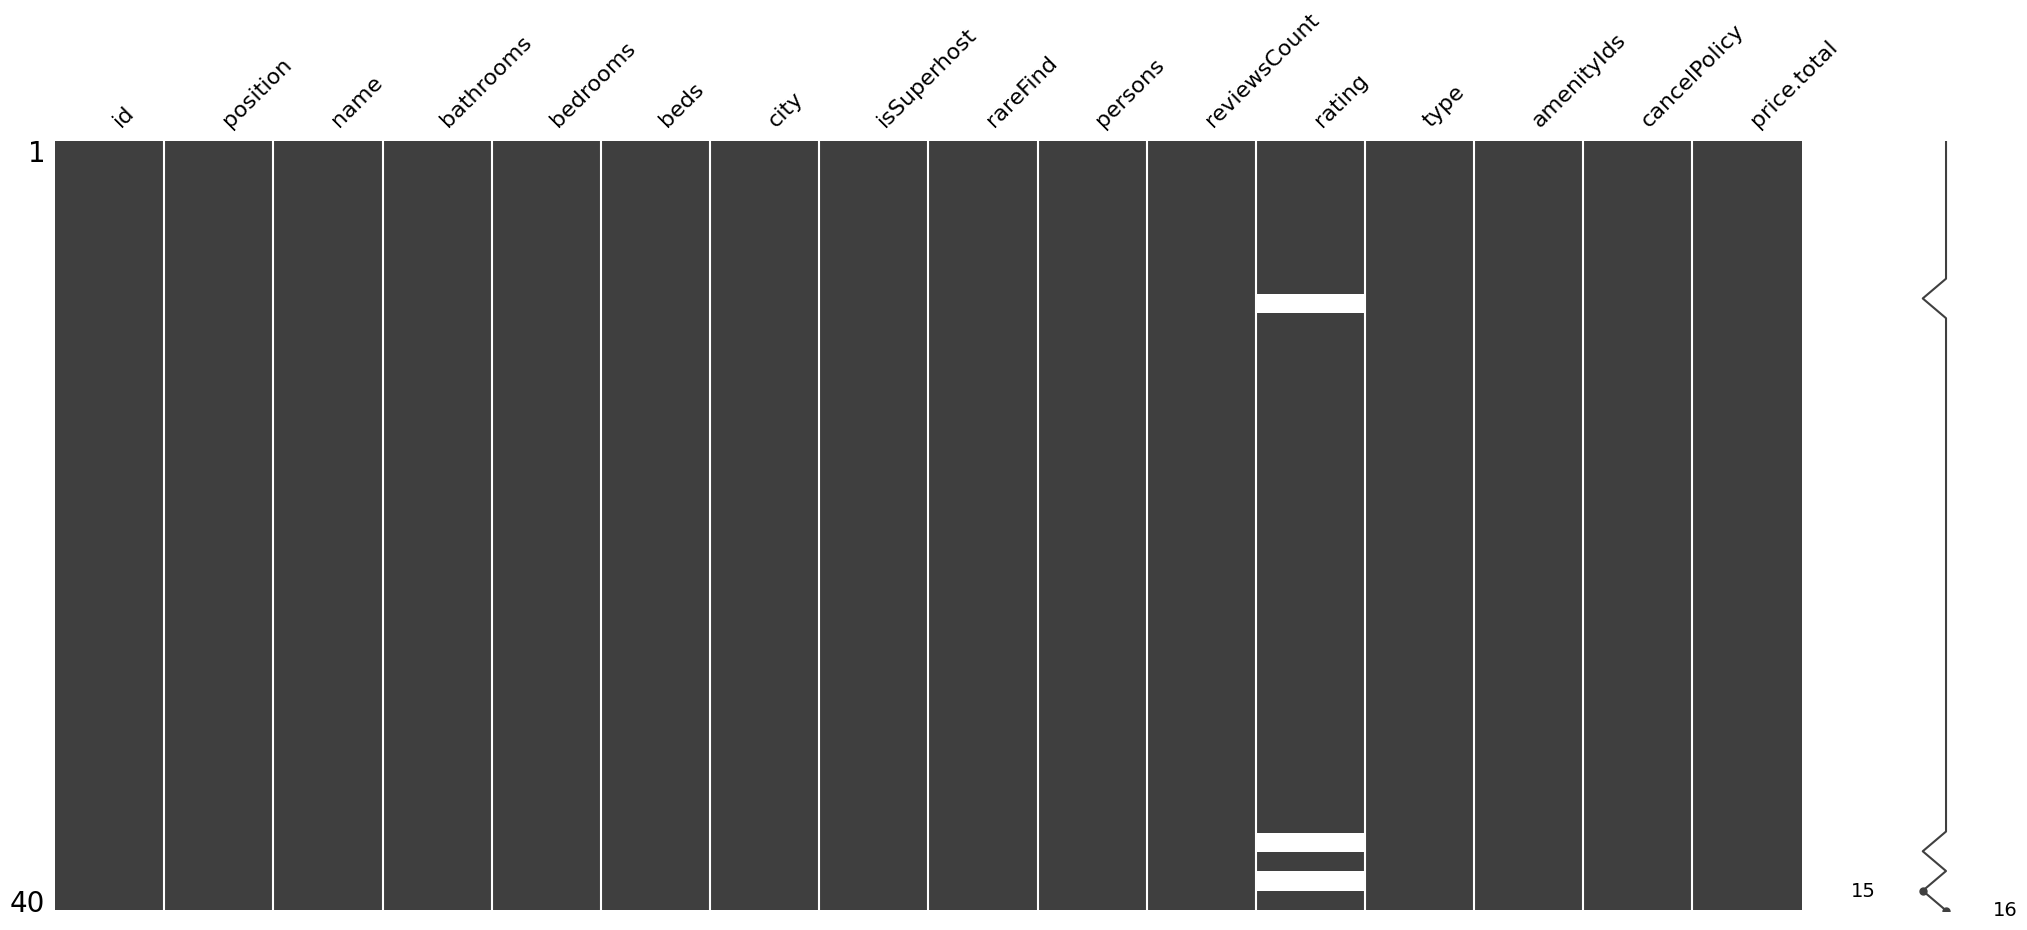

In [14]:
msno.matrix(df)

Existen 4 filas de la columna "rating" con valores nulos.

In [15]:
df.rating.std()

0.3211655294350521

In [16]:
ratingstd = df.rating.std()

Completo los valores nulos con el standard ya que es el valor mas proximo a 0. De esta manera tengo todos los datos completos.

In [17]:
df['rating'] = df.rating.fillna(ratingstd)

In [18]:
df.describe()

,position,bathrooms,bedrooms,beds,persons,reviewsCount,rating,price.total
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,1.050000,1.000000,1.175000,1.950000,175.925000,4.342337,96.175000
std,11.690452,0.151911,0.226455,0.500641,0.749359,262.824343,1.199957,29.514783
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.321166,41.000000
25%,10.750000,1.000000,1.000000,1.000000,2.000000,27.750000,4.452500,75.500000
50%,20.500000,1.000000,1.000000,1.000000,2.000000,78.000000,4.710000,98.000000
75%,30.250000,1.000000,1.000000,1.000000,2.000000,195.750000,4.915000,111.000000
max,40.000000,1.500000,2.000000,3.000000,5.000000,1412.000000,5.000000,158.000000


## Variables isSuperhost y rareFind

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

*Airbnb Superhost es un programa diseñado para identificar, promover y recompensar a los anfitriones más hospitalarios.*

[Text(0, 0, 'No es Superhost'), Text(1, 0, 'Superhost')]

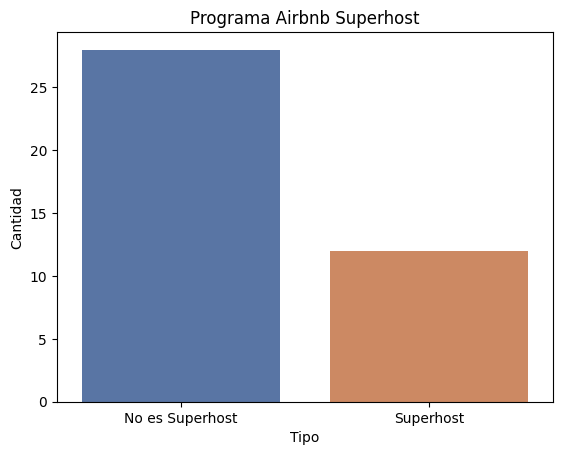

In [20]:
sh = sns.countplot(data=df, x= "isSuperhost", palette='deep')
sh.set_title('Programa Airbnb Superhost')
labels = ('No es Superhost', 'Superhost')
sh.set_ylabel('Cantidad')
sh.set_xlabel('Tipo')
sh.set_xticklabels(labels)

In [21]:
print(df.value_counts('isSuperhost'))
print(df['isSuperhost'].value_counts().mul(100)/len(df))

isSuperhost
False    28
True     12
dtype: int64
False    70.0
True     30.0
Name: isSuperhost, dtype: float64


*rare Find es una insignia que se le asigna a las propiedades que generalmente sen encuentran reservadas en un 90 %, y se selecciona una de las fechas libres dentro de ese 10% que no esta acupado.*

In [22]:
print(df.value_counts('rareFind'))
print(df['rareFind'].value_counts().mul(100)/len(df))

rareFind
False    40
dtype: int64
False    100.0
Name: rareFind, dtype: float64


Como el 100% de los datos se incluyen en una unica categoría podemos proceder a eliminar dicha columna.

In [23]:
df = df.drop(columns=['rareFind'], axis=1)
df.head()

,id,position,name,bathrooms,bedrooms,beds,city,isSuperhost,persons,reviewsCount,rating,type,amenityIds,cancelPolicy,price.total
0,43449093,1,Room in the heart of Paris,1.0,1,1,Paris,False,1,262,4.53,Entire rental unit,"[35, 611, 4, 103, 40, 104, 42, 11, 44, 45, 77,...",CANCEL_MODERATE,83
1,855813754445433021,2,"Love Nest, Marais",1.0,1,1,Paris,False,2,9,4.89,Entire rental unit,"[1, 35, 4, 37, 8, 40, 12, 45, 77, 51, 85, 54, ...",CANCEL_MODERATE,98
2,774582581519038073,3,Chill out room.,1.0,1,1,Clichy,True,1,28,4.93,Private room in bed and breakfast,"[1, 35, 227, 4, 5, 37, 8, 42, 15, 47, 287]",CANCEL_FLEXIBLE,49
3,42654284,4,Paris: Chambre en duplex à la Villette,1.0,1,1,Paris,True,2,30,4.93,Private room in condo,"[1, 33, 35, 611, 4, 100, 8, 40, 45, 77, 46, 15...",CANCEL_FLEXIBLE,111
4,31884678,5,Quiet room - Private bathroom + toilet @ 5min ...,1.0,1,1,Issy-les-Moulineaux,True,2,204,4.89,Private room in condo,"[1, 129, 4, 73, 137, 10, 394, 77, 79, 21, 85, ...",CANCEL_MODERATE,130


## Variable reviewsCount

<Axes: >

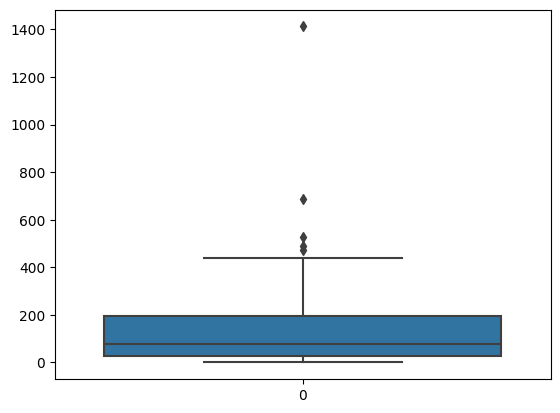

In [24]:
sns.boxplot(df.reviewsCount)

In [25]:
df.reviewsCount.describe()

count      40.000000
mean      175.925000
std       262.824343
min         0.000000
25%        27.750000
50%        78.000000
75%       195.750000
max      1412.000000
Name: reviewsCount, dtype: float64

##Eliminar Outliers